In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from control.matlab import *


In [2]:
def linestyle_generator():
    linestyle=['-','--','-.',':']
    line_id=0
    while True:
        yield linestyle[line_id]
        line_id=(line_id+1)%len(linestyle)

def plot_set(ax,*args):
    ax.set_xlabel(args[0])
    ax.set_ylabel(args[1])
    ax.grid(ls=':')
    if len(args)==3:
        ax.legend(loc=args[2])

def bodeplot_set(ax,*args):
    # ゲイン線図
    ax[0].grid(which='both',ls=':')
    ax[0].set_ylabel("Gain [dB]")
    
    # 位相線図
    ax[1].grid(which='both',ls=':')
    ax[1].set_xlabel("$\omega$ [rad/s]")
    ax[1].set_ylabel("Phase [deg]")

    if len(args)>0:
        ax[0].legend(loc=args[0])
    if len(args)>1:
        ax[1].legend(loc=args[1])

    
    

### 1次遅れ
<!-- $p(s)=\{a}{a}$ -->

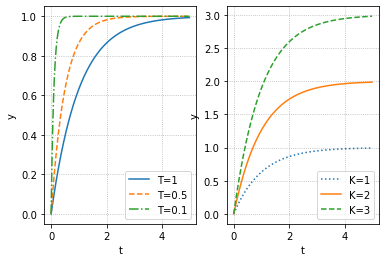

In [18]:
# 1次遅れ
fig,ax=plt.subplots(1,2)
LS=linestyle_generator()

T_list=[1,0.5,0.1]
K_list=np.full_like(T_list,1)
for T,K in zip(T_list,K_list):
    P=tf([0,K],[T,1]) # 1次遅れの伝達関数
    y,t=step(P,np.arange(0,5,0.01))# ステップ応答
    ax[0].plot(t,y,ls=next(LS),label="T="+str(T))
plot_set(ax[0],'t','y','best')

K_list=[1,2,3]
T_list=np.full_like(K_list,1)
for T,K in zip(T_list,K_list):
    P=tf([0,K],[T,1]) # 1次遅れの伝達関数
    y,t=step(P,np.arange(0,5,0.01))# ステップ応答
    ax[1].plot(t,y,ls=next(LS),label="K="+str(K))
plot_set(ax[1],'t','y','best')

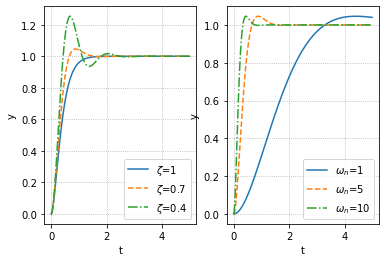

In [32]:
# 2次遅れ
fig,ax=plt.subplots(1,2)
LS=linestyle_generator()
t_range=np.arange(0,5,0.01)

zeta_list=[1,0.7,0.4]
omega_n_list=np.full_like(zeta_list,5)
for zeta,omega_n in zip(zeta_list,omega_n_list):
    P=tf([0,omega_n**2],[1,2*zeta*omega_n,omega_n**2]) # 2次遅れの伝達関数
    y,t=step(P,t_range)# ステップ応答
    ax[0].plot(t,y,ls=next(LS),label="$\zeta$="+str(zeta))
plot_set(ax[0],'t','y','best')

LS=linestyle_generator()
omega_n_list=[1,5,10]
zeta_list=np.full_like(omega_n_list,0.7,dtype=float)
for zeta,omega_n in zip(zeta_list,omega_n_list):
    P=tf([0,omega_n**2],[1,2*zeta*omega_n,omega_n**2]) # 2次遅れの伝達関数
    y,t=step(P,t_range)# ステップ応答
    ax[1].plot(t,y,ls=next(LS),label="$\omega_n$="+str(omega_n))
plot_set(ax[1],'t','y','best')

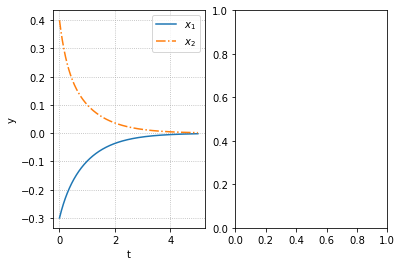

In [41]:
# 状態空間モデルの時間応答
# 伝達関数だと入出力しかみれなかったけど、状態空間モデルだと初期値の影響(零入力応答)も見れる
fig,ax=plt.subplots(1,2)
Td=np.arange(0,5,0.01)
X0=[-0.3,0.4]# -0.3と0.4からスタートして、どちらも零に収束している

A=[[0,1],[-4,-5]]
B=[[0],[1]]
C=np.eye(2)#2*2の単位行列
D=np.zeros([2,1])

P=ss(A,B,C,D)

x,t=initial(P,Td,X0)#零入力応答

ax[0].plot(t,x[:,0],label="$x_1$")
ax[0].plot(t,x[:,1],ls='-.',label="$x_2$")

plot_set(ax[0],'t','y','best')
